# Data understanding 


First of all we import the libraries

In [2]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

Now, we utilize the pandas library to read data from a CSV file named "iris.csv" in the "dataset" directory.

In [159]:
df=pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)

-	What kind of attributes do we have?
-	How is the data quality?
-	Does a visualization help?
-	Are attributes correlated?
-	What about outliers?
-	How are missing values handled?
-	Do we need to extract other attributes?

In [51]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [11]:
df.shape

(15000, 24)

In [13]:
# -	What kind of attributes do we have?
df.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [80]:
df.describe(include="all")

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,15000,1.500000e+04,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000,15000
unique,15000,NaN,2,NaN,6257,9820,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,Long Road,NaN,False,NaN,Vybz Kartel,The Hardcore Archive Part 3 (1997),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-dance
freq,1,NaN,14034,NaN,80,32,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750
mean,NaN,2.468075e+05,NaN,27.423667,NaN,NaN,0.551063,0.656231,5.287867,-8.894999,...,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647,NaN
std,NaN,1.279941e+05,NaN,18.587534,NaN,NaN,0.194239,0.264371,3.585023,6.005799,...,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616,NaN
min,NaN,8.586000e+03,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,-49.531000,...,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116,NaN
25%,NaN,1.800000e+05,NaN,14.000000,NaN,NaN,0.441000,0.480000,2.000000,-10.636250,...,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953,NaN
50%,NaN,2.278260e+05,NaN,24.000000,NaN,NaN,0.580000,0.709000,5.000000,-7.303000,...,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916,NaN
75%,NaN,2.889030e+05,NaN,42.000000,NaN,NaN,0.695000,0.884000,8.000000,-5.101000,...,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057,NaN


We notice that all the attributes that indicate the "genre" of the songs have the same frequency (quante volte è ripetuto quel genere)

In [84]:
df["genre"].value_counts()
dict(df["genre"].value_counts())

{'j-dance': 750,
 'iranian': 750,
 'brazil': 750,
 'chicago-house': 750,
 'forro': 750,
 'idm': 750,
 'indian': 750,
 'study': 750,
 'disney': 750,
 'afrobeat': 750,
 'mandopop': 750,
 'techno': 750,
 'sleep': 750,
 'spanish': 750,
 'j-idol': 750,
 'industrial': 750,
 'happy': 750,
 'bluegrass': 750,
 'black-metal': 750,
 'breakbeat': 750}

These attributes have some missing values:

- mode: 4450
- time_signature: 2062
- popularity_confidence: 12783

### Gestione missing values

- Siccome popularity_confidence ha troppi valori mancanti ed è simile all'attributo popularity, nella fase di data preparation potremmo aggregarli per ridurre la dimensione del dataframe
- Intendendo mode(vedi definizione) come accordi minori o maggiori e ipotizzando che minori sono canzoni tristi mentre maggiori felici.
Si può immaginare che magari un genere sia più triste o felice di un altro(x esempio genre:'happy' avrà probabilmente molti mode maggiori).
Quindi x i missing value di mode possiamo fare riferimento ai valori di genre (usando magari una moda )

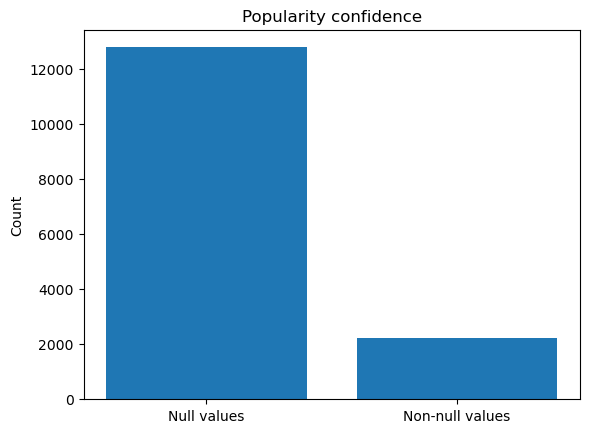

In [119]:
missing_values_pop_conf=df['popularity_confidence'].isnull().sum()
data=df['popularity_confidence'].shape[0]
non_null=data-missing_values_pop_conf
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_pop_conf,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Popularity confidence')

plt.show()

In [47]:
print(df.isnull().any(), "\n------------------------------------------------\n" ,df.isnull().sum())

name                     False
duration_ms              False
explicit                 False
popularity               False
artists                  False
album_name               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
genre                    False
dtype: bool 
------------------------------------------------
 name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceab

nell'attributo mode anche se è un float64 abbiamo solo valori 0.0 o 1.0 o NaN, quindi probabilmente potremmo fare la binarization e trasformarlo in un attributo binario. 

In [75]:
mode=list(df["mode"])
print(mode[0:20])

[1.0, 0.0, nan, 1.0, 1.0, nan, 1.0, nan, nan, 1.0, 1.0, 0.0, 1.0, nan, nan, nan, 0.0, nan, nan, 0.0]


## Cose che abbiamo osservato: 

- Nell'attributo mode anche se è un float64 abbiamo solo valori 0.0 o 1.0 o NaN, quindi probabilmente potremmo fare la binarization e trasformarlo in un attributo binario. Guardare parte di binarizzazione dell'attributo sex nel dataset del titanic
- We notice that all the attributes that indicate the "genre" of the songs have the same frequency (quante volte è ripetuto quel genere)
- Siccome popularity_confidence ha troppi valori mancanti ed è simile all'attributo popularity, nella fase di data preparation potremmo aggregarli per ridurre la dimensione del dataframe
- Intendendo mode(vedi definizione) come accordi minori o maggiori e ipotizzando che minori sono canzoni tristi mentre maggiori felici.
Si può immaginare che magari un genere sia più triste o felice di un altro(x esempio genre:'happy' avrà probabilmente molti mode maggiori).
Quindi x i missing value di mode possiamo fare riferimento ai valori di genre (usando magari una moda )

0    46
1     0
2     3
3    23
4    25
Name: popularity, dtype: int64


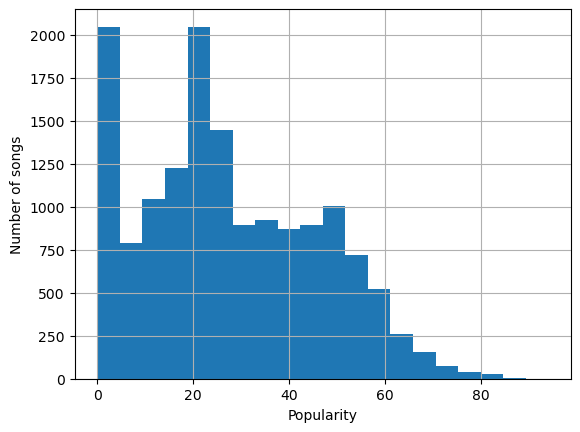

In [71]:
print(df["popularity"].head(5))
df['popularity'].hist(bins=20)
plt.xlabel("Popularity")
plt.ylabel("Number of songs")
plt.show()

- Modificare duration_ms in duration da millisecondi a minuti

In [174]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
df_copy.head()


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.029333
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.400000
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.558433
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.496667
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.127517


In [ ]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
df_copy.head()


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.029333
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.400000
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.558433
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.496667
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.127517


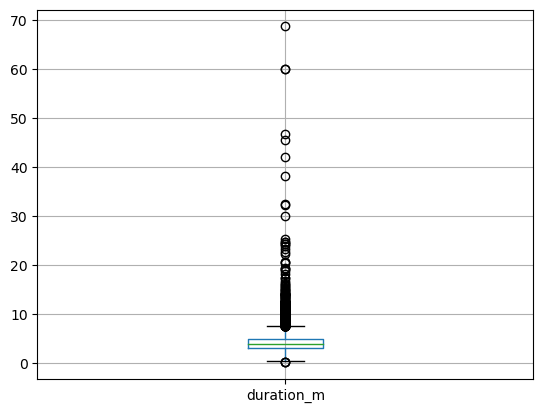

In [172]:
boxplot = df_copy.boxplot(column=['duration_m'])